# Исследование данных сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи** — `users_go.csv`
- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

**Поездки** — `rides_go.csv`
- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах)
- `date` — дата совершения поездки

**Подписки** — `subscriptions_go.csv`
- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

## Шаг 1. Загрузка данных

Импортируем необходимые библиотеки, cчитаем CSV-файлы с данными и сохраним их в датафреймы. Изучим общую информацию о каждом датафрейме.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [7]:
%config InlineBackend.figure_format = 'retina'

In [8]:
def show_df_info(df):
    display(df.head())
    display(df.info())

### Пользователи

In [10]:
data_users = pd.read_csv('../datasets/users_go.csv')
show_df_info(data_users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

### Поездки

In [12]:
data_rides = pd.read_csv('../datasets/rides_go.csv', parse_dates=['date'])
show_df_info(data_rides)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

### Подписки

In [14]:
data_subscriptions = pd.read_csv('../datasets/subscriptions_go.csv')
show_df_info(data_subscriptions)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

### Вывод

Загружена информация о некоторых пользователях популярного сервиса аренды самокатов GoFast (1565 записей), их поездках (18068 записей), а также о двух типах подписки.

## Шаг 2. Предобработка данных

К анализу отдельных параметров и проверке гипотез приступим чуть позже, а для начала займемся предобработкой данных. Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

### Пользователи

Проверим наличие явных дубликатов в данных о пользователях. В датафрейме в столбце `user_id` не дожно быть дублирования уникальных идентификаторов пользователей (на то они и уникальные).

In [21]:
data_users.duplicated(subset=['user_id']).sum()

31

В данных о пользователях есть дубликаты — удалим их.

In [23]:
data_users = data_users.drop_duplicates(subset=['user_id'])

Проверим пропуски в данных о пользователях.

In [25]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропусков нет. Теперь проверим наличие используемых в датафрейме с пользователями типах подписки (столбец `subscription_type`) в датафрейме с подписками.

In [27]:
# типы подписок, используемые в датафрейме с пользователями
used_keys = set(data_users['subscription_type'].unique()) 
# варианты подписок в датафрейме с подписками
allowed_keys = set(data_subscriptions['subscription_type'].unique())

if len(used_keys - allowed_keys) > 0:
    display('Нарушение ограничения внешнего ключа')
else:
    display('ok')

'ok'

### Поездки

Проверим наличие явных дубликатов в данных о поездках.

In [30]:
data_rides.duplicated().sum()

0

В данных о поездках явных дубликатов нет. Проверим пропуски.

In [32]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

Пропусков нет. Теперь проверим наличие используемых в датафрейме с поездками идентификаторах пользователей (столбец `user_id`) в датафрейме с пользователями.

In [34]:
# идентификаторы пользователей, используемые в датафрейме с поездками
used_keys = set(data_rides['user_id'].unique()) 
# идентификаторы пользователей в датафрейме с пользователями
allowed_keys = set(data_users['user_id'].unique())

if len(used_keys - allowed_keys) > 0:
    display('Нарушение ограничения внешнего ключа')
else:
    display('ok')

'ok'

Проверим, за какой период у нас есть информация о поездках пользователей.

In [36]:
data_rides['date'].min(), data_rides['date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

Данные собраны за период с января по декабрь 2021 года. Создадим новый столбец `date_month` с номером месяца на основе столбца `date`.

In [38]:
data_rides['date_month'] = data_rides['date'].dt.month

### Подписки

Проверим наличие явных дубликатов и пропусков в данных о подписках.

In [41]:
data_subscriptions.duplicated().sum()

0

In [42]:
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В данных о подписках нет ни явных дубликатов, ни пропусков.

## Шаг 3. Исследовательский анализ данных

Проанализируем общую информацию о пользователях и поездках.

### Частота встречаемости городов

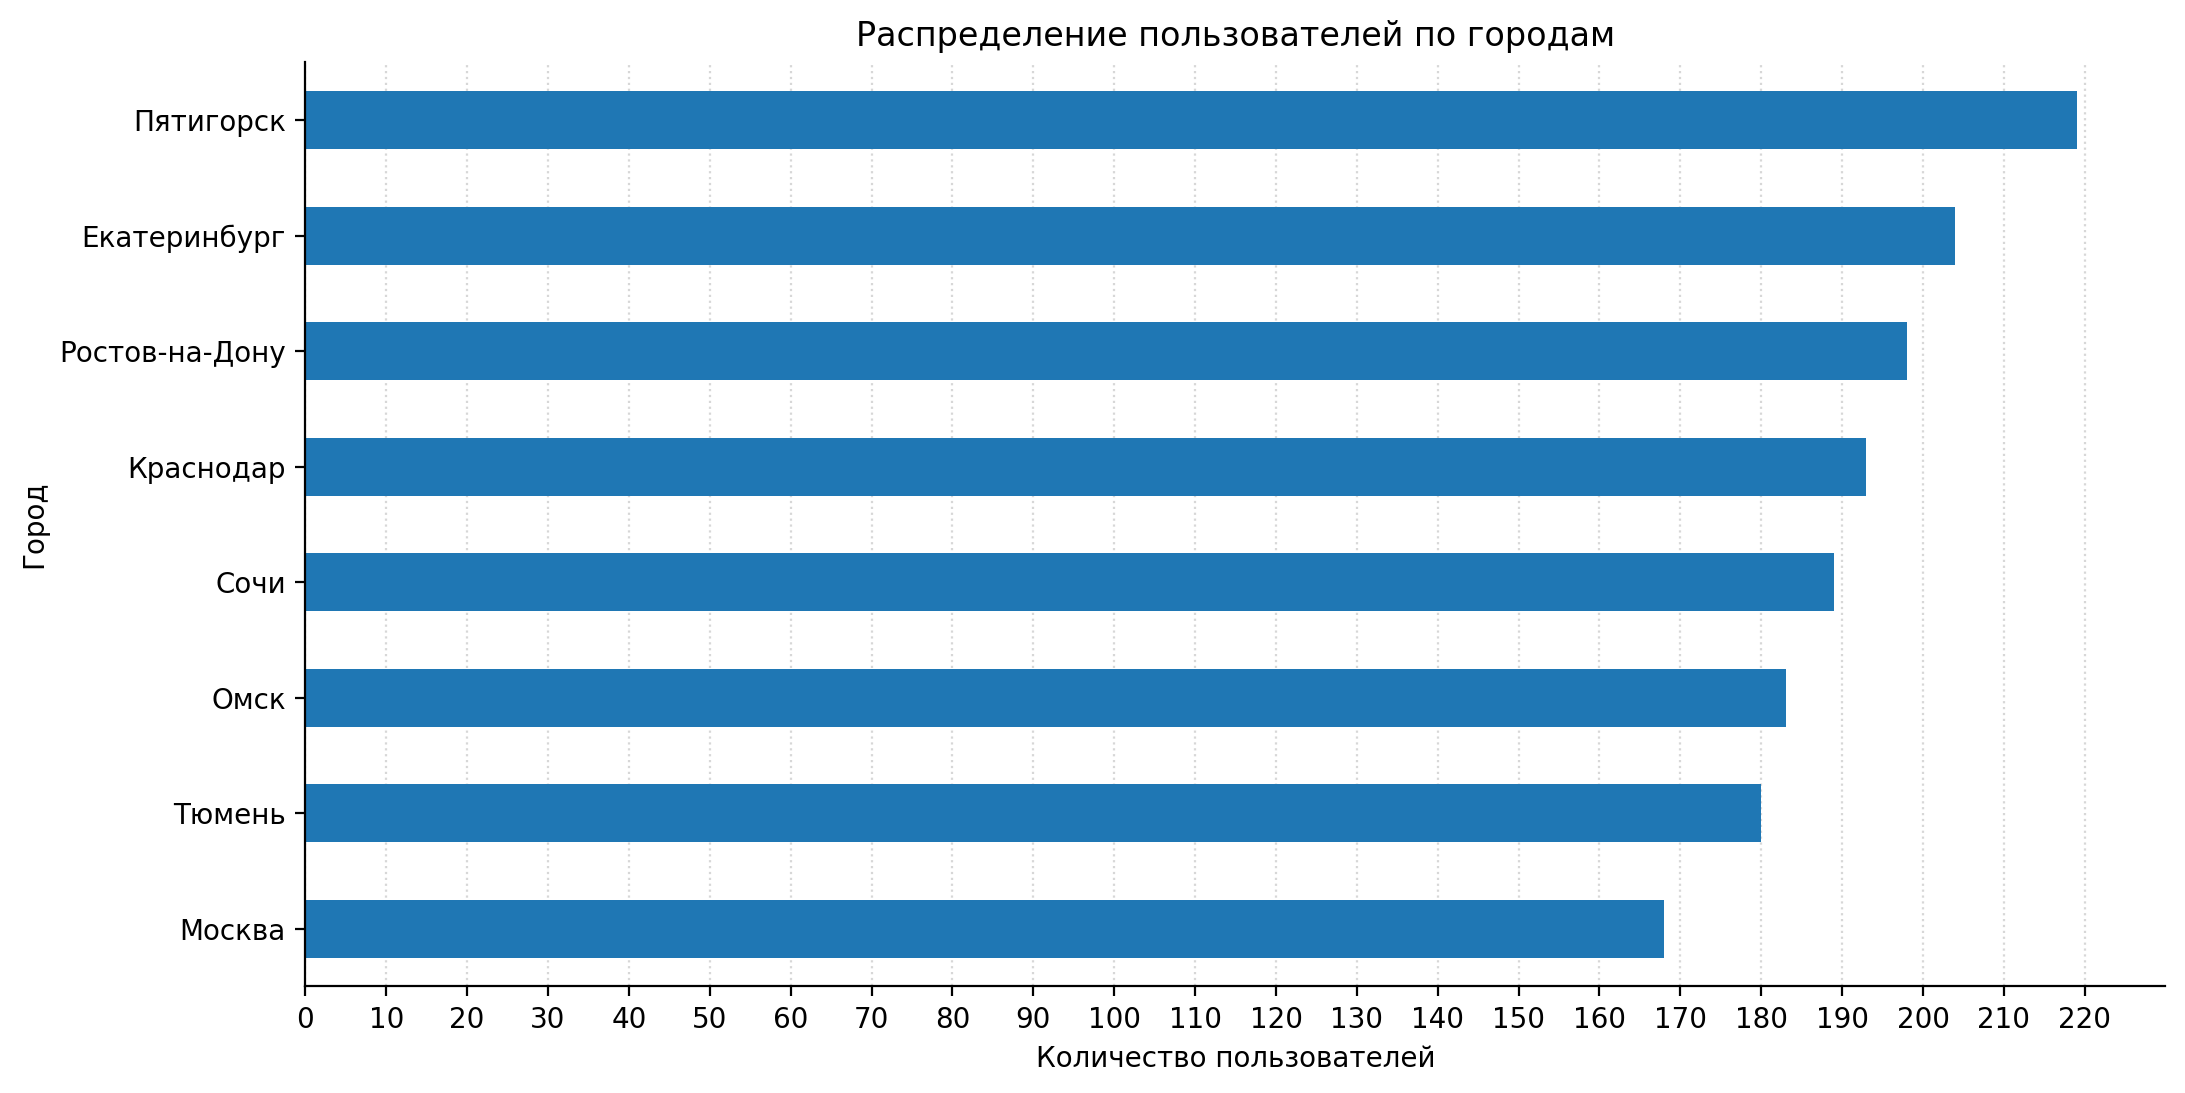

In [47]:
ax = (
    data_users['city']
    .value_counts()
    .sort_values(ascending=True)
    .plot(kind='barh', figsize=(12, 6))
)
ax.set_title('Распределение пользователей по городам')
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Город')
ax.set_xticks(np.arange(0, data_users['city'].value_counts().max() + 10, 10))
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.5, linestyle=':')

В выборку попали данные о пользователях из 8 городов. Больше всего пользователей из Пятигорска, меньше всего — из Москвы. Выглядит странно, самый большой город на последнем месте. Тут может быть несколько причин:
- Была взята случайная выборка. Однако на ее репрезентативность повлияло смещение в сторону каких-то отдельных городов внутри генеральной совокупности.
- Была взята стратифицированная выборка — из генеральной совокупности взяты пропорциональные случайные выборки по городам. В таком случае мы можем сделать вывод, что популярность сервиса аренды самокатов GoFast в разных городах очень сильно различается. В Пятигорске, например, это может быть единственный подобный сервис. А жители Москвы отдают предпочтение другим сервисам аренды самокатов — GoGoFast и CoolRide.

### Соотношение пользователей с подпиской и без подписки

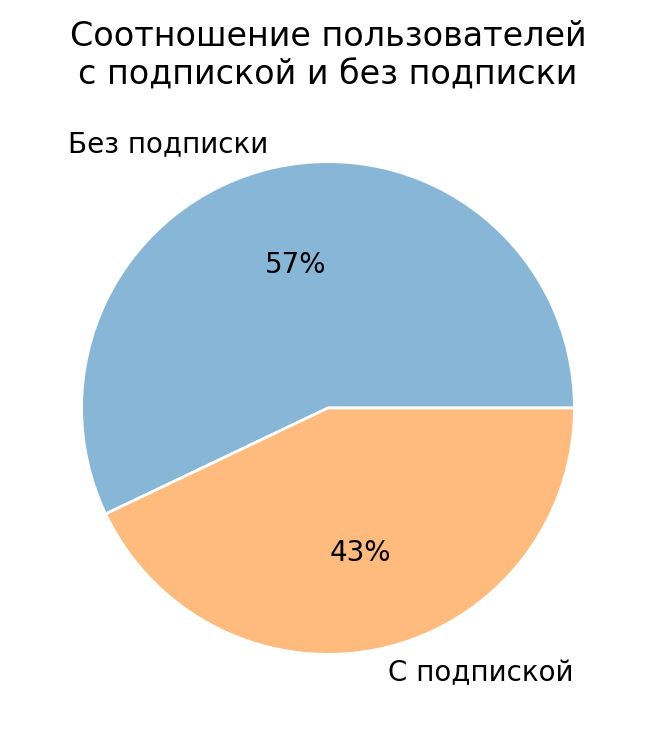

In [50]:
ax = (
    data_users.query('city == "Пятигорск"')['subscription_type']
    .value_counts()
    .rename({'free': 'Без подписки', 'ultra': 'С подпиской'})
    .plot(
        kind='pie', 
        figsize=(4, 4), 
        autopct='%.0f%%', 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        colors=['#1f77b488', '#ff7f0e88']
    )
)
ax.set_title('Соотношение пользователей\nс подпиской и без подписки')
ax.set_ylabel('')
pass

Пользователей без подписки в выборка примерно 57%, а с подпиской — 43%.

### Возраст пользователей

Посмотрим на числовое описание данных в столбце с возрастом `age`.

In [54]:
data_users['age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
age,1534.0,24.90352,4.572367,12.0,22.0,25.0,28.0,43.0


Посмотрим на гистограмму и диаграмму размаха возраста.

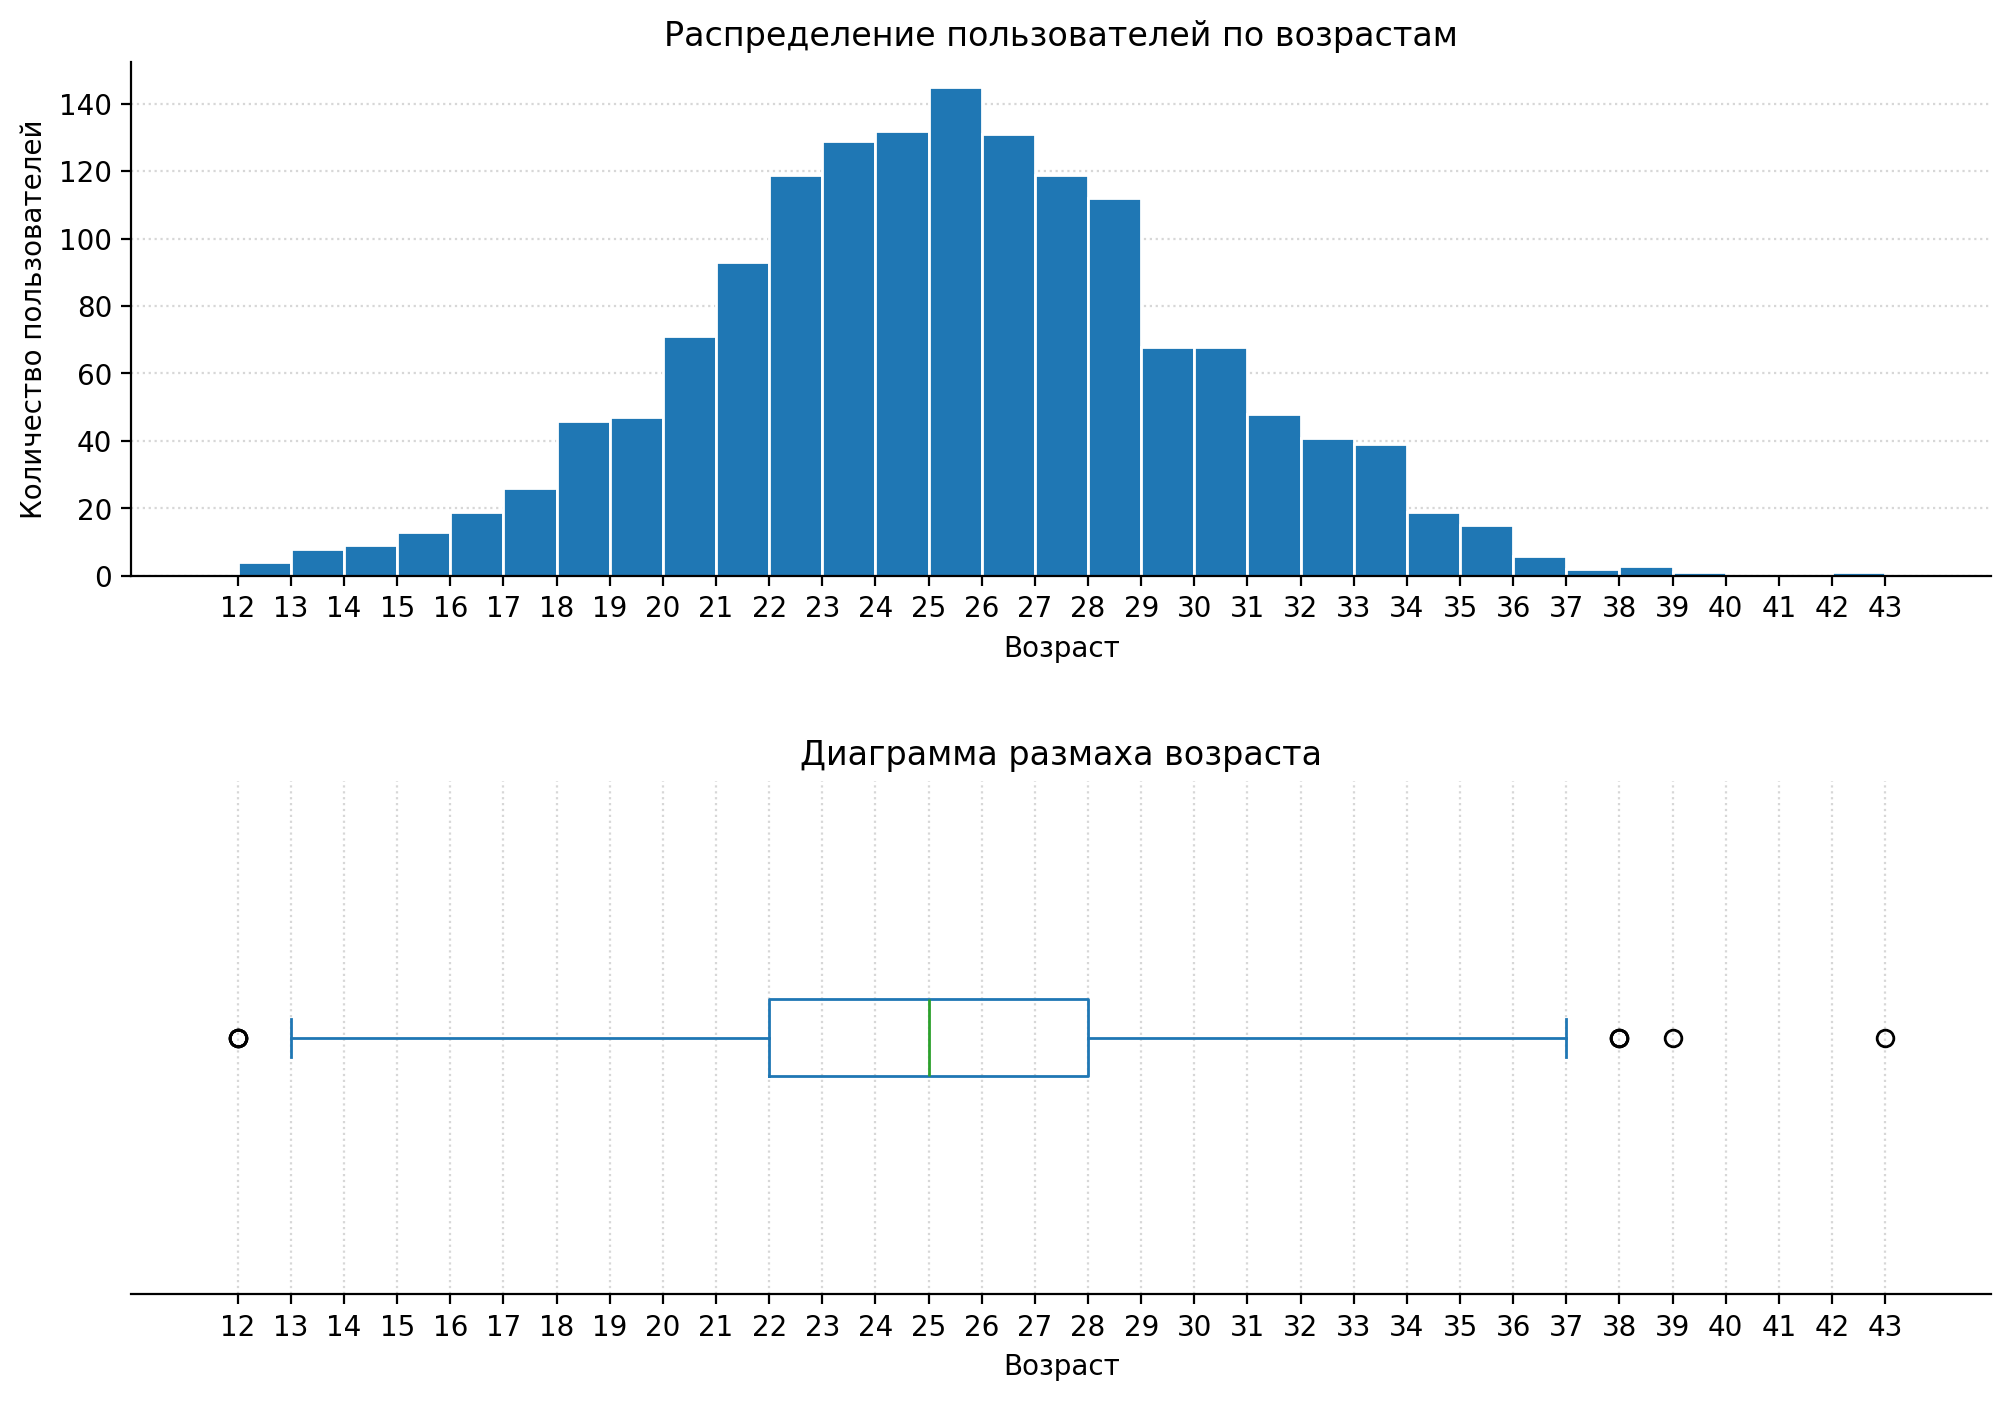

In [56]:
min_value = 12
max_value = 43
bin_width = 1

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 1)
ax1 = data_users['age'].plot(
    kind='hist', 
    bins=int((max_value - min_value) / bin_width), 
    range=(min_value, max_value),
    edgecolor='white'
)
ax1.set_title('Распределение пользователей по возрастам')
ax1.set_xlim([min_value - bin_width * 2, max_value + bin_width * 2])
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество пользователей')
ax1.set_xticks(np.arange(min_value, max_value + bin_width, bin_width))
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_axisbelow(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='y', alpha=0.5, linestyle=':')

plt.subplot(2, 1, 2)
ax2 = data_users['age'].plot(kind='box', vert=False)
ax2.set_title('Диаграмма размаха возраста')
ax2.set_xlim([min_value - bin_width * 2, max_value + bin_width * 2])
ax2.set_xlabel('Возраст')
ax2.set_xticks(np.arange(min_value, max_value + bin_width, bin_width))
ax2.set_xticklabels(ax2.get_xticks())
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(axis='x', alpha=0.5, linestyle=':')

pass

Целевая аудитория сервиса аренды самокатов GoFast — молодые люди в возрасте от 22 до 28 лет. Пользователи такого возраста составляют примерно половину выборки. Средний возраст — примерно 25 лет. Минимальный и максимальный возраст пользователей — 12 лет и 43 года соответственно.

### Расстояние поездок

Посмотрим на числовое описание данных в столбце с расстоянием поездки `distance`.

In [60]:
data_rides['distance'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
distance,18068.0,3070.659976,1116.831209,0.855683,2543.22636,3133.609994,3776.222735,7211.007745


Посмотрим на гистограмму и диаграмму размаха расстояния поездки.

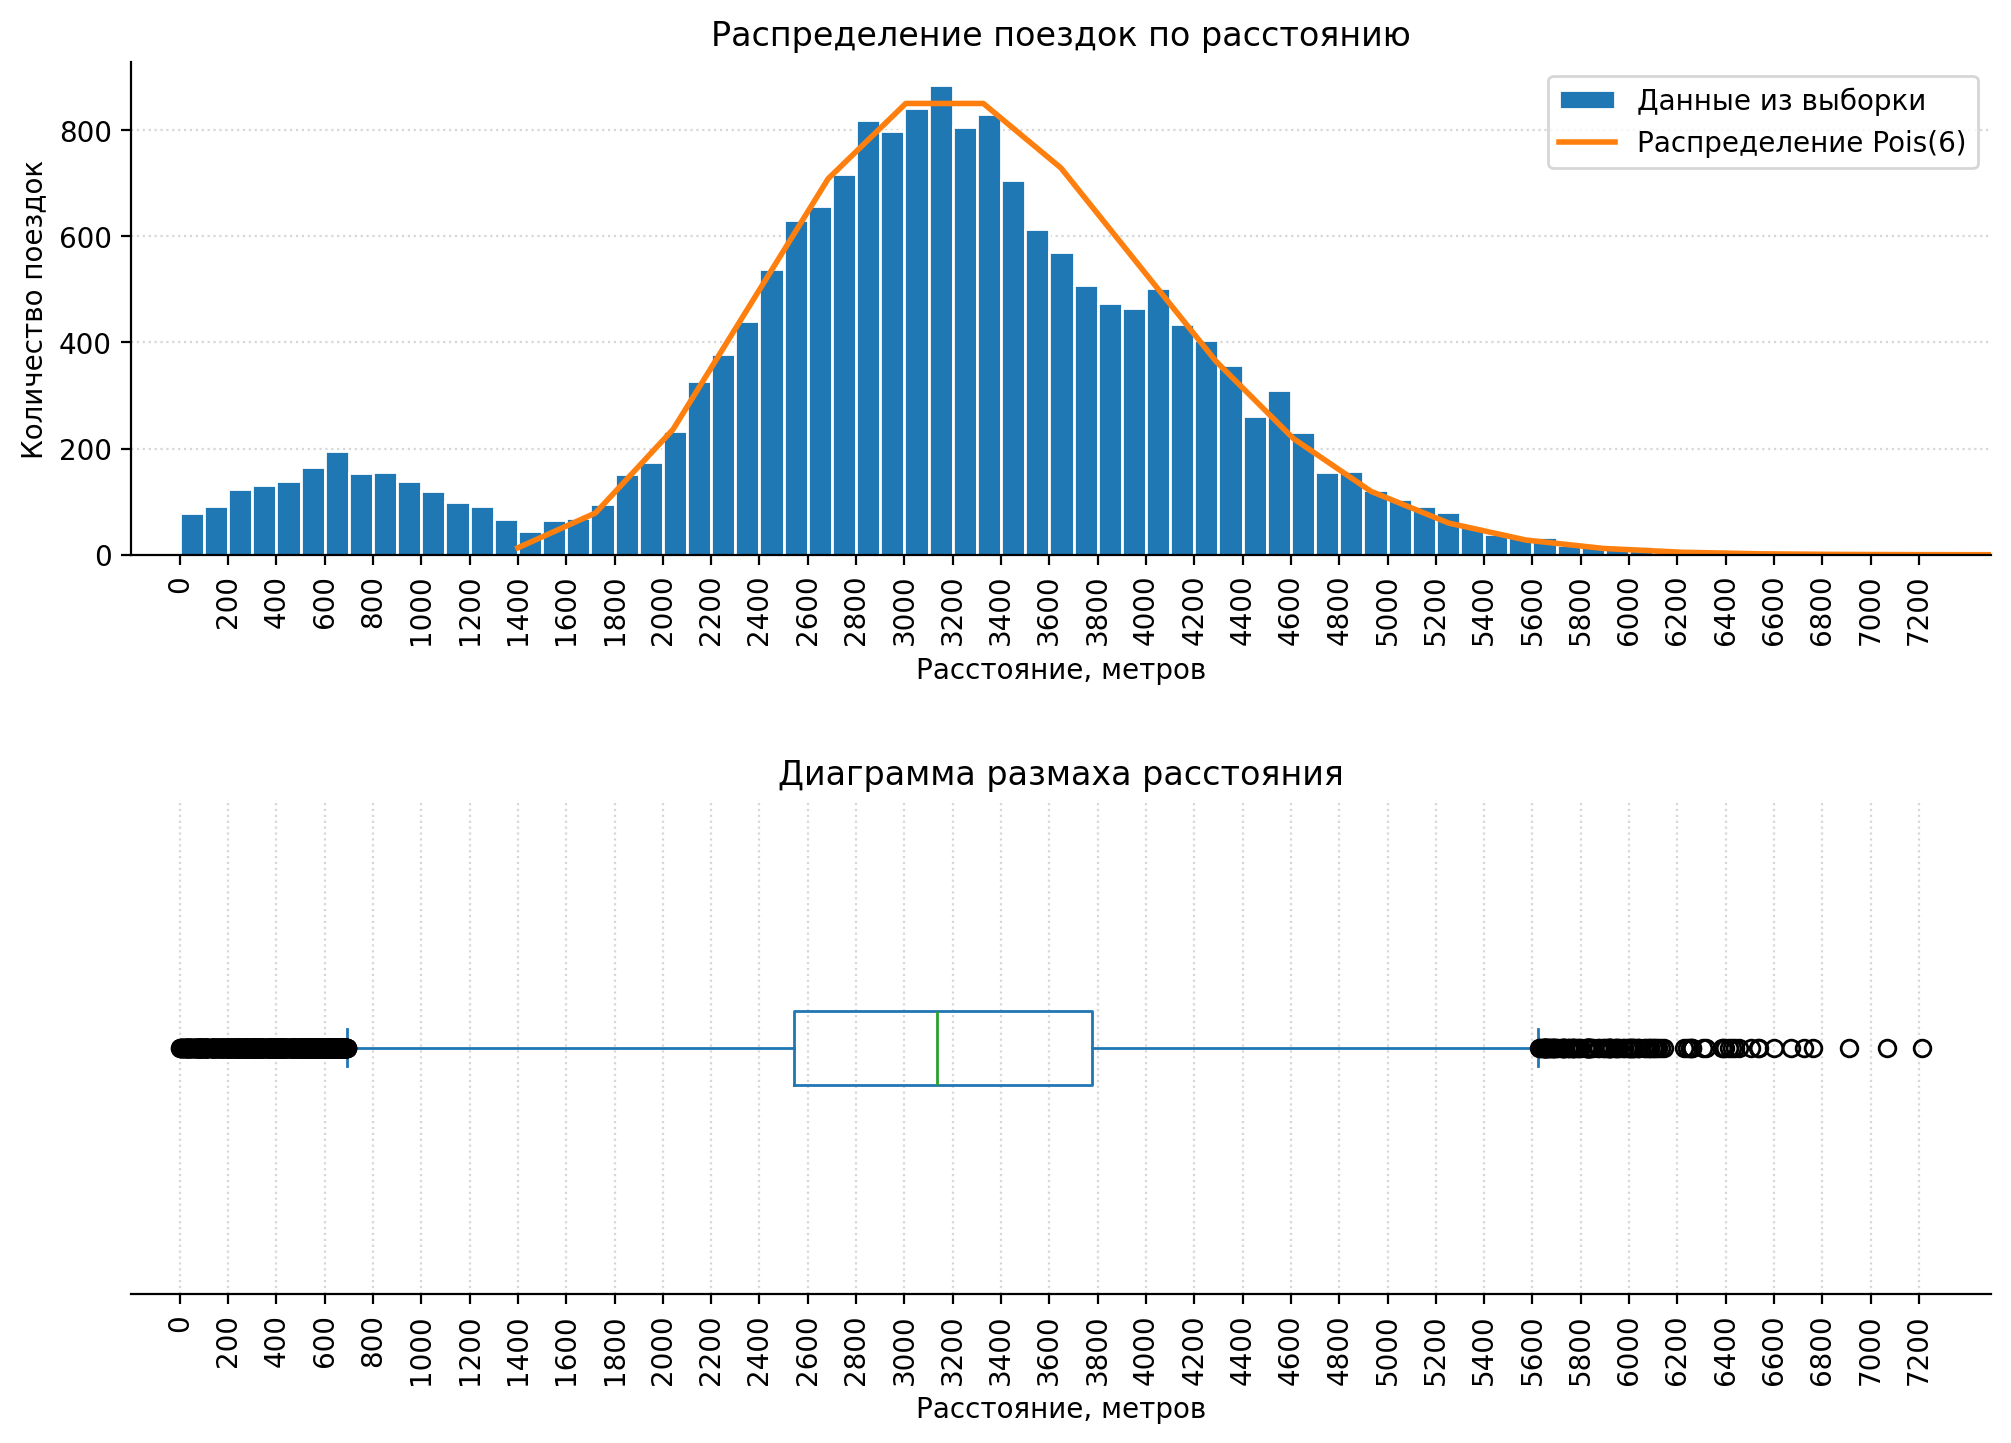

In [62]:
min_value = 0
max_value = 7300
bin_width = 100

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
ax1 = data_rides['distance'].plot(
    kind='hist', 
    bins=int((max_value - min_value) / bin_width), 
    range=(min_value, max_value),
    edgecolor='white'
)

# распределение Пуассона для «длинных» поездок
x_threshold = 1400
lmbd = 6
ratio = st.poisson.pmf(lmbd, lmbd) / 850
x_values = np.arange(0, 100)
ax1.plot(
    x_values * (data_rides.query('distance >= @x_threshold')['distance'].mean() - x_threshold) / lmbd + x_threshold, 
    st.poisson.pmf(x_values, lmbd) / ratio,
    linewidth=2
)

ax1.set_title('Распределение поездок по расстоянию')
ax1.set_xlim([min_value - bin_width * 2, max_value + bin_width * 2])
ax1.set_xlabel('Расстояние, метров')
ax1.set_ylabel('Количество поездок')
ax1.set_xticks(np.arange(min_value, max_value + bin_width, bin_width * 2))
ax1.set_xticklabels(ax1.get_xticks(), rotation=90)
ax1.legend(['Данные из выборки', f'Распределение Pois({lmbd})'])
ax1.set_axisbelow(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='y', alpha=0.5, linestyle=':')

plt.subplot(2, 1, 2)
ax2 = data_rides['distance'].plot(kind='box', vert=False)
ax2.set_title('Диаграмма размаха расстояния')
ax2.set_xlim([min_value - bin_width * 2, max_value + bin_width * 2])
ax2.set_xlabel('Расстояние, метров')
ax2.set_xticks(np.arange(min_value, max_value + bin_width, bin_width * 2))
ax2.set_xticklabels(ax2.get_xticks(), rotation=90)
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(axis='x', alpha=0.5, linestyle=':')

pass

Распределение расстояния поездок неплохо аппроксимируется скошенным вправо распределением Пуассона с небольшой лямбдой (λ 
~6).

На гистограмме распределения расстояния поездок хорошо прослеживаются два сегмента — «короткие» (с пиком ~600 метров) и «длинные» (с пиком ~3 км) поездки, при этом «коротких» поездок гораздо меньше. Вероятно, такие сегменты обусловлены различными целями аренды самокатов: «короткие» поездки для того, чтобы протестировать сервис или чтобы добраться от остановки общественного транспорта до дома или работы, а «длинные» — для развлечения, чтобы прогуляться, ну и чтобы волосы развевались на ветру, и чтобы стаканчик латте в руке обязательно.

### Продолжительность поездок

Посмотрим на числовое описание данных в столбце с продолжительностью поездки `duration`.

In [66]:
data_rides['duration'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
duration,18068.0,17.805011,6.091051,0.5,13.597563,17.678395,21.7248,40.823963


Посмотрим на гистограмму и диаграмму размаха продолжительности поездки.

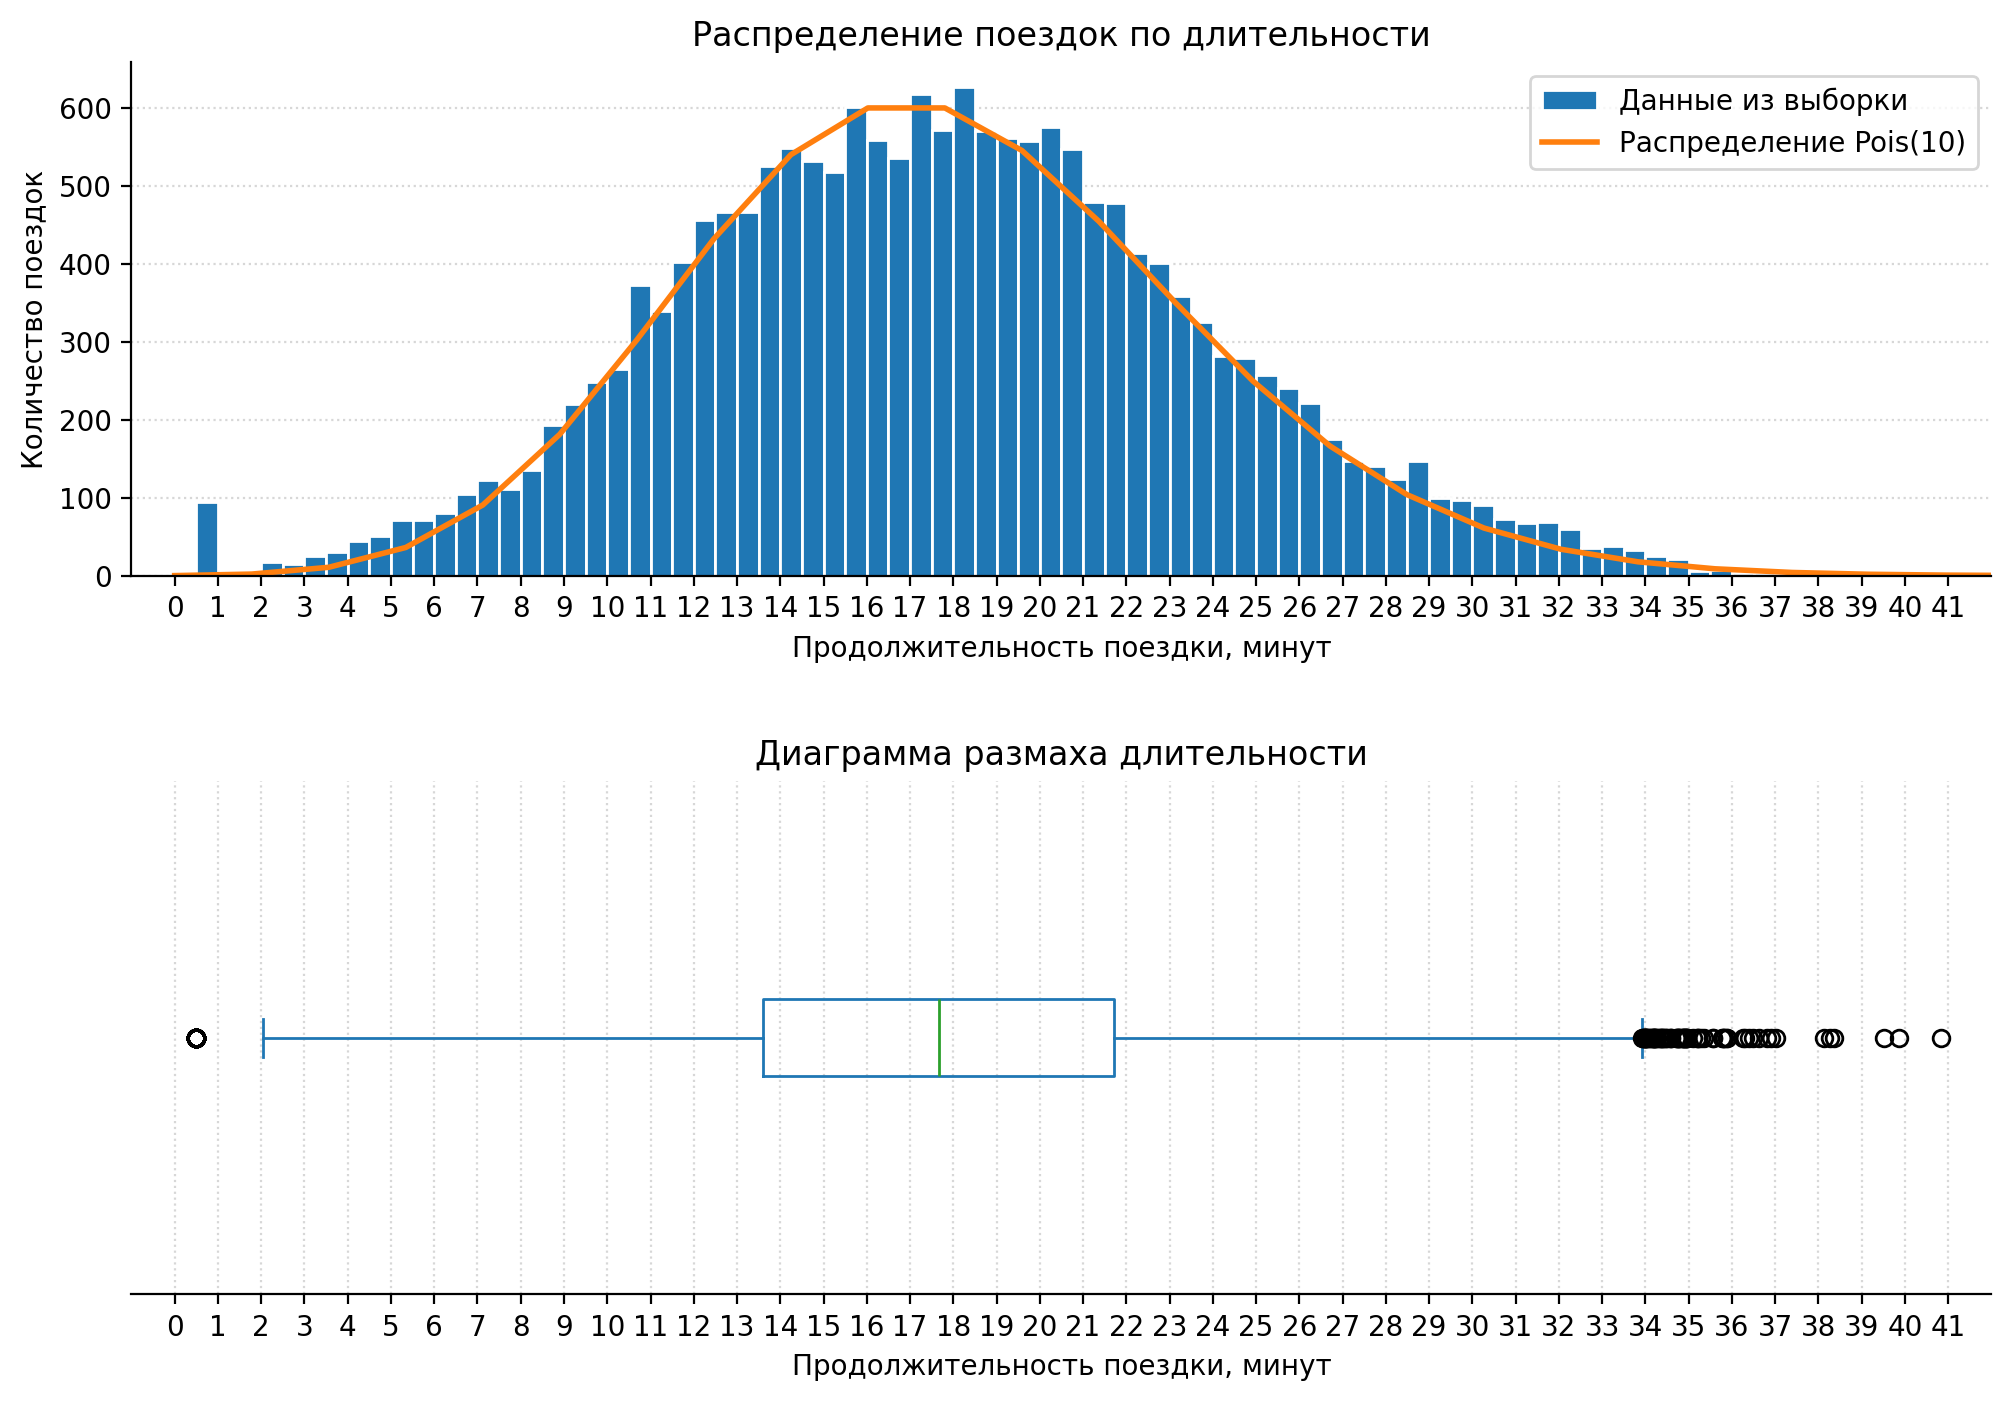

In [68]:
min_value = 0
max_value = 41
bin_width = 0.5

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 1)
ax1 = data_rides['duration'].plot(
    kind='hist', 
    bins=int((max_value - min_value) / bin_width),
    range=(min_value, max_value),
    edgecolor='white'
)

# распределение Пуассона для «длинных» поездок
lmbd = 10
ratio = st.poisson.pmf(lmbd, lmbd) / 600
x_values = np.arange(0, 100)
ax1.plot(
    x_values * data_rides['duration'].mean() / lmbd, 
    st.poisson.pmf(x_values, lmbd) / ratio,
    linewidth=2
)

ax1.set_title('Распределение поездок по длительности')
ax1.set_xlim([min_value - bin_width * 2, max_value + bin_width * 2])
ax1.set_xlabel('Продолжительность поездки, минут')
ax1.set_ylabel('Количество поездок')
ax1.set_xticks(np.arange(min_value, max_value + bin_width, bin_width * 2, dtype='int'))
ax1.set_xticklabels(ax1.get_xticks())
ax1.legend(['Данные из выборки', f'Распределение Pois({lmbd})'])
ax1.set_axisbelow(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='y', alpha=0.5, linestyle=':')

plt.subplot(2, 1, 2)
ax2 = data_rides['duration'].plot(kind='box', vert=False)
ax2.set_title('Диаграмма размаха длительности')
ax2.set_xlim([min_value - bin_width * 2, max_value + bin_width * 2])
ax2.set_xlabel('Продолжительность поездки, минут')
ax2.set_xticks(np.arange(min_value, max_value + bin_width, bin_width * 2, dtype='int'))
ax2.set_xticklabels(ax2.get_xticks())
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(axis='x', alpha=0.5, linestyle=':')

pass

Распределение длительности поездок неплохо аппроксимируется распределением Пуассона с λ = 10, чуть скошено вправо.

Средняя длительность поездок составляет около 18 минут. Половина поездок длятся от 13 до 22 минут. Однако на гистограмме явно виден пик меньше одной минуты. Посмотрим внимательней.

In [70]:
data_rides.query('duration < 1').sort_values(by='distance').head()

,user_id,distance,duration,date,date_month
15132,1325,4030.308008,0.5,2021-12-22,12
17909,1524,4103.998874,0.5,2021-06-18,6
10692,1006,4106.278268,0.5,2021-10-31,10
9698,937,4169.066800,0.5,2021-12-12,12
14342,1268,4177.139336,0.5,2021-06-09,6


За пол минуты на самокате вряд ли получится проехать 4 километра (ну разве что вертикально, в свободном падении). Очевидно, такие аномалии образовались в результате технических сбоев или программной ошибки — об этом стоит сообщить технической команде сервиса. Например, мог сбоить гео-модуль в самокатах, тогда стоит проанализировать, носят ли такие сбои случайный характер, или зависят от определенных локаций, или же связаны с конкретными «сломанными» самокатами.

Удалим из данных аномальные значения.

In [72]:
data_rides = data_rides.query('duration >= 1')

## Шаг 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм и посмотрим, что получилось.

In [75]:
united_data = (
    data_rides
    .merge(data_users, on='user_id')
    .merge(data_subscriptions, on='subscription_type')
)
united_data.head()

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [76]:
if len(data_rides) == len(united_data) and united_data.isna().sum().sum() == 0:
    display('Объединение прошло успешно')
else:
    display('Ошибка объединения')

'Объединение прошло успешно'

Размерность датафрейма с поездками до объединения совпадает с размерность получившегося в результате объединения датафрейма. Пропусков не обнаружено — объединение прошло успешно.

Создадим ещё два датафрейма на основе объединенного:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [79]:
# данные о пользователях без подписки
free_subscription_data = united_data.query('subscription_type == "free"')
# данные о пользователях с подпиской
ultra_subscription_data = united_data.query('subscription_type == "ultra"')

In [80]:
if len(free_subscription_data) + len(ultra_subscription_data) != len(united_data):
    display('Хьюстон, у нас проблема!')
else:
    display('ok')

'ok'

Суммарное количество поездок с подпиской и поездок без подписки соответствует количеству поездок да разделения данных на две категории. 

### Сезонность поездок

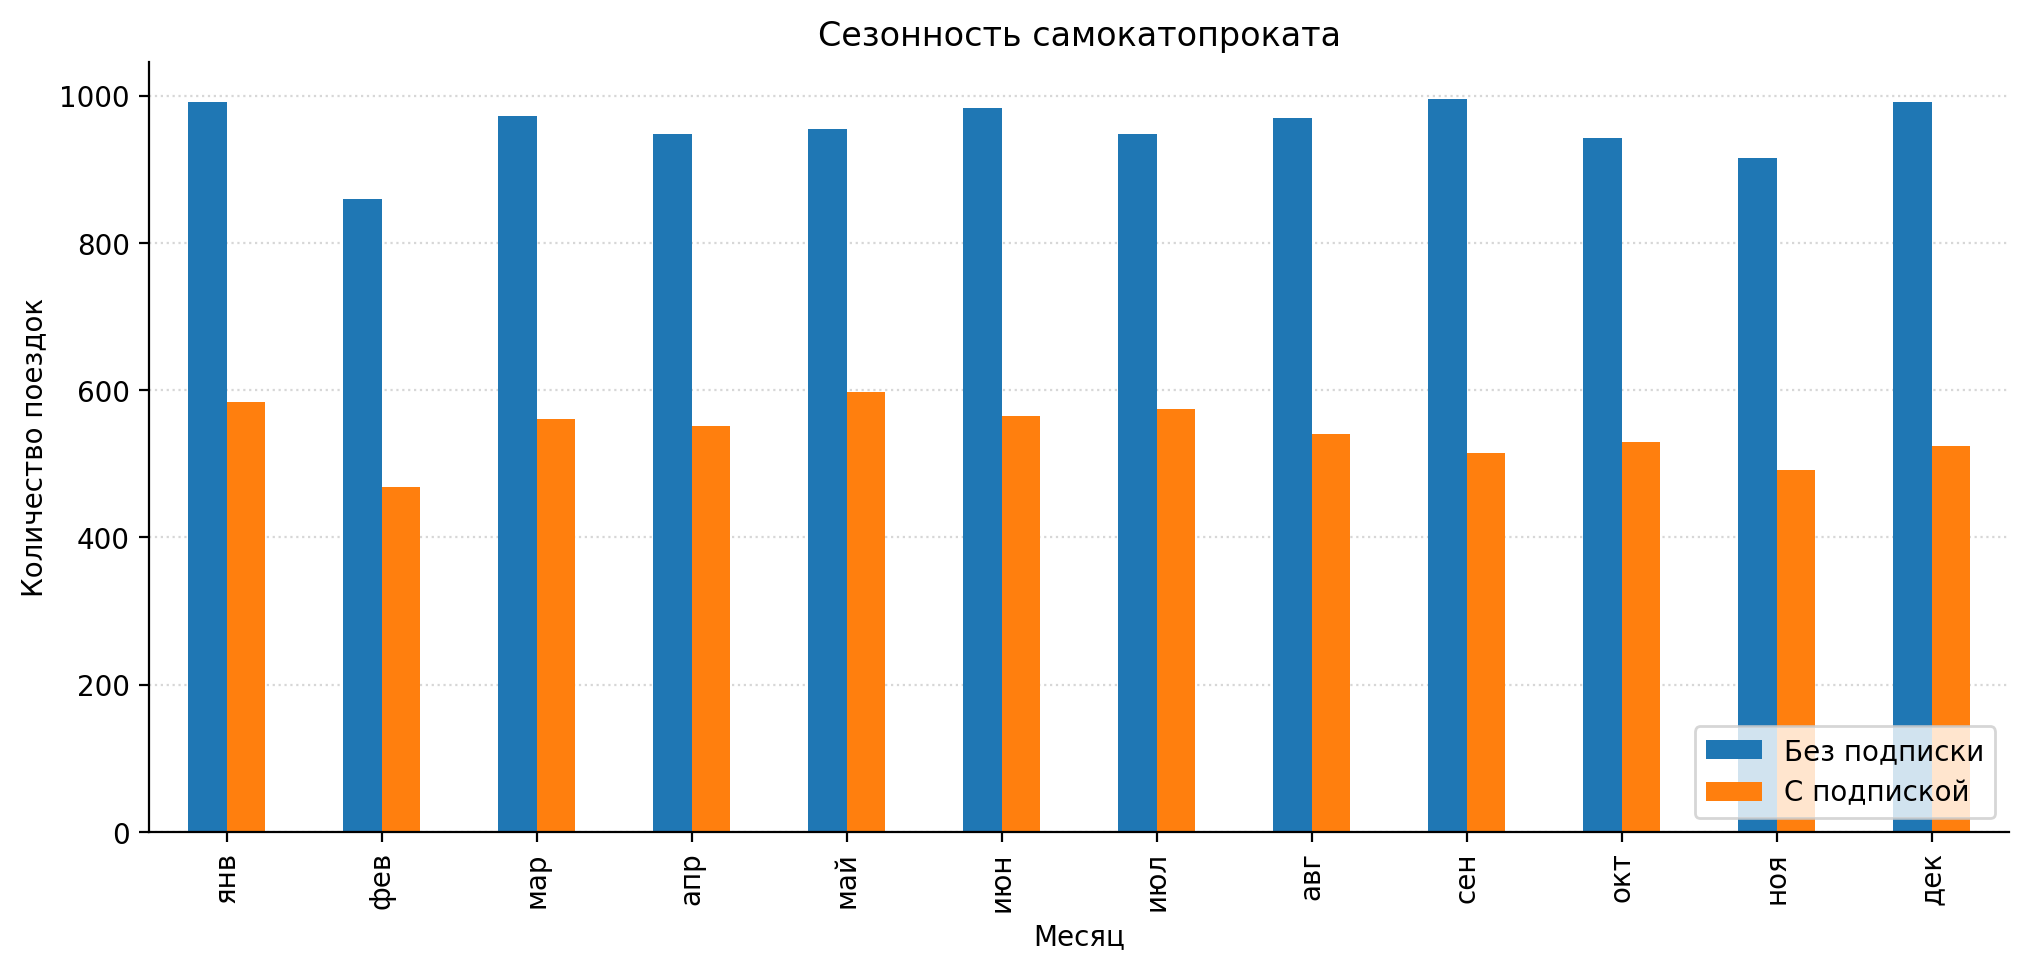

In [83]:
ax = (
    united_data
    .pivot_table(index='date_month', columns='subscription_type', values='user_id', aggfunc='count')
    .plot(kind='bar', figsize=(12, 5))
)
ax.set_title('Сезонность самокатопроката')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество поездок')
ax.set_xticklabels(['янв', 'фев', 'мар', 'апр', 'май', 'июн', 'июл', 'авг', 'сен', 'окт', 'ноя', 'дек'])
ax.legend(
    ['Без подписки', 'С подпиской'],
    loc='lower right'
)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.5, linestyle=':')
pass

Как для пользователей с подпиской, так и для пользователей без нее, самыми «неактивными» месяцами являются февраль и ноябрь. Однако, как это ни странно, в зимние месяцы нет сильного спада активности по сравнению с летними месяцами. При этом в выборке данных присутствуют не только южные города, но и города со сложным климатом. Можно предположить, что из генеральной совокупности взяты не пропорциональные выборки по месяцам.

### Расстояние поездок с подпиской и без подписки

Посмотрим на числовое описание данных в столбце с расстоянием поездки `distance` для пользователей обеих категорий.

In [87]:
pd.concat([
    ultra_subscription_data['distance'].describe().to_frame(name='distance, с подпиской').T,
    free_subscription_data['distance'].describe().to_frame(name='distance, без подписки').T
])

,count,mean,std,min,25%,50%,75%,max
"distance, с подпиской",6500.0,3115.445388,836.895330,244.210438,2785.444017,3148.637229,3560.574425,5699.769662
"distance, без подписки",11473.0,3028.374239,1235.541051,0.855683,2360.878149,3102.083025,3883.979311,7066.003772


<a id='distance_by_subscription_type'></a>Визуализируем информацию о расстоянии поездок, которые совершают пользователи с подпиской и без нее.

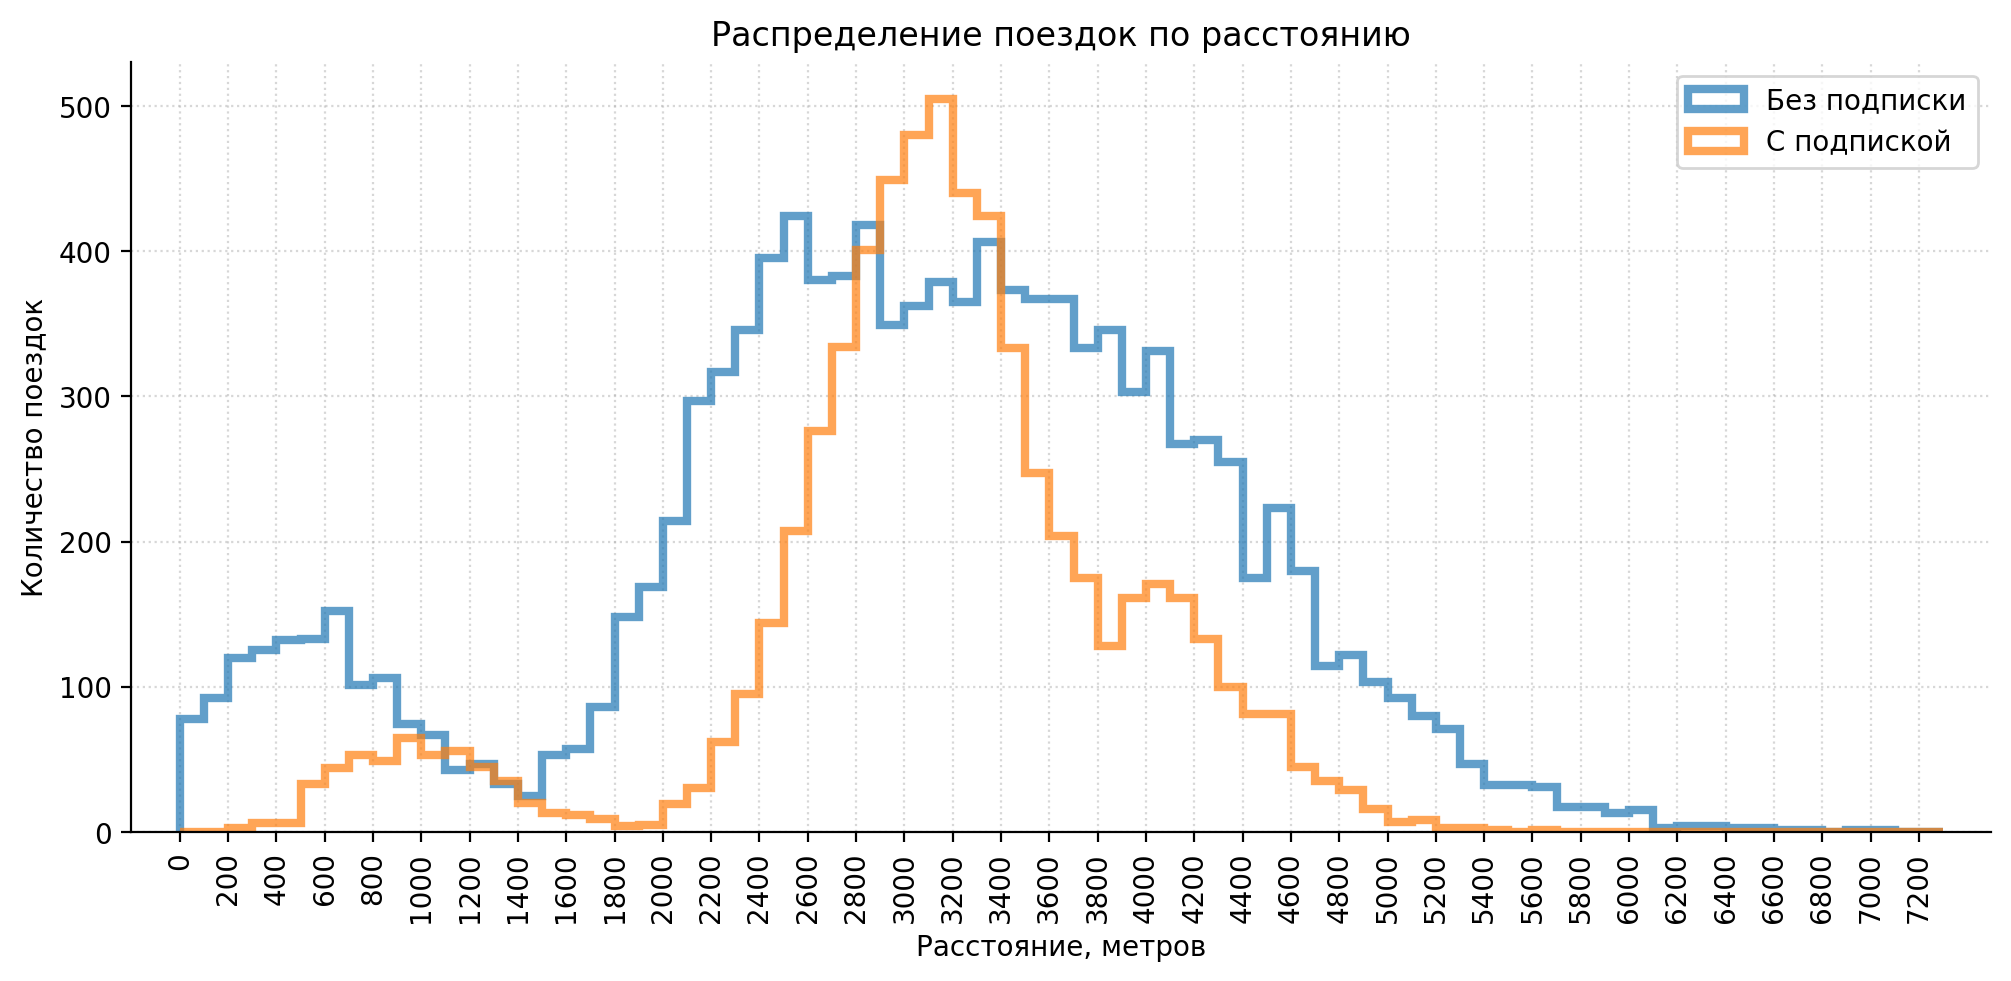

In [89]:
min_value, max_value = 0, 7300
bin_width = 100

plt.figure(figsize=(12, 5))

ax = free_subscription_data['distance'].plot(
    kind='hist',
    histtype='step',
    bins=int((max_value - min_value) / bin_width), 
    range=(min_value, max_value),
    linewidth=3,
    alpha=0.7,
    label='Без подписки',
    legend=True
)

ultra_subscription_data['distance'].plot(
    kind='hist',
    histtype='step',
    bins=int((max_value - min_value) / bin_width), 
    range=(min_value, max_value),
    linewidth=3,
    alpha=0.7,
    label='С подпиской',
    ax=ax,
    legend=True
)

ax.set_title('Распределение поездок по расстоянию')
ax.set_xlim([min_value - bin_width * 2, max_value + bin_width * 2])
ax.set_xlabel('Расстояние, метров')
ax.set_ylabel('Количество поездок')
ax.set_xticks(np.arange(min_value, max_value + bin_width, bin_width * 2))
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.5, linestyle=':')

pass

In [90]:
f'Процент «коротких» поездок у пользователей без подписки: \
{len(free_subscription_data.query("distance < 1400")) / len(free_subscription_data) * 100:.2f}%'

'Процент «коротких» поездок у пользователей без подписки: 11.36%'

In [91]:
f'Процент «коротких» поездок у пользователей с подпиской: \
{len(ultra_subscription_data.query("distance < 1900")) / len(ultra_subscription_data) * 100:.2f}%'

'Процент «коротких» поездок у пользователей с подпиской: 7.78%'

И у пользователей с подпиской, и у пользователей без подписки наблюдаются сегменты «коротких» и «длинных» с точки зрения расстояния поездок. Доля «коротких» поедок больше у пользоватлей без подписки. При этом в сегменте «длинных» поездок у пользователей с подпиской гораздо меньше отклонение от центра распределения, чем у пользователей без подписки.

### Продолжительность поездок с подпиской и без подписки 

Посмотрим на числовое описание данных в столбце с продолжительностью поездки `duration` для пользователей обеих категорий.

In [95]:
pd.concat([
    ultra_subscription_data['duration'].describe().to_frame(name='duration, с подпиской').T,
    free_subscription_data['duration'].describe().to_frame(name='duration, без подписки').T
])

,count,mean,std,min,25%,50%,75%,max
"duration, с подпиской",6500.0,18.541985,5.572048,3.760353,14.524654,18.178153,21.884129,40.823963
"duration, без подписки",11473.0,17.530771,6.162609,2.035632,13.085688,17.383807,21.638038,34.948498


Визуализируем информацию о продолжительности поездок, которые совершают пользователи с подпиской и без нее.

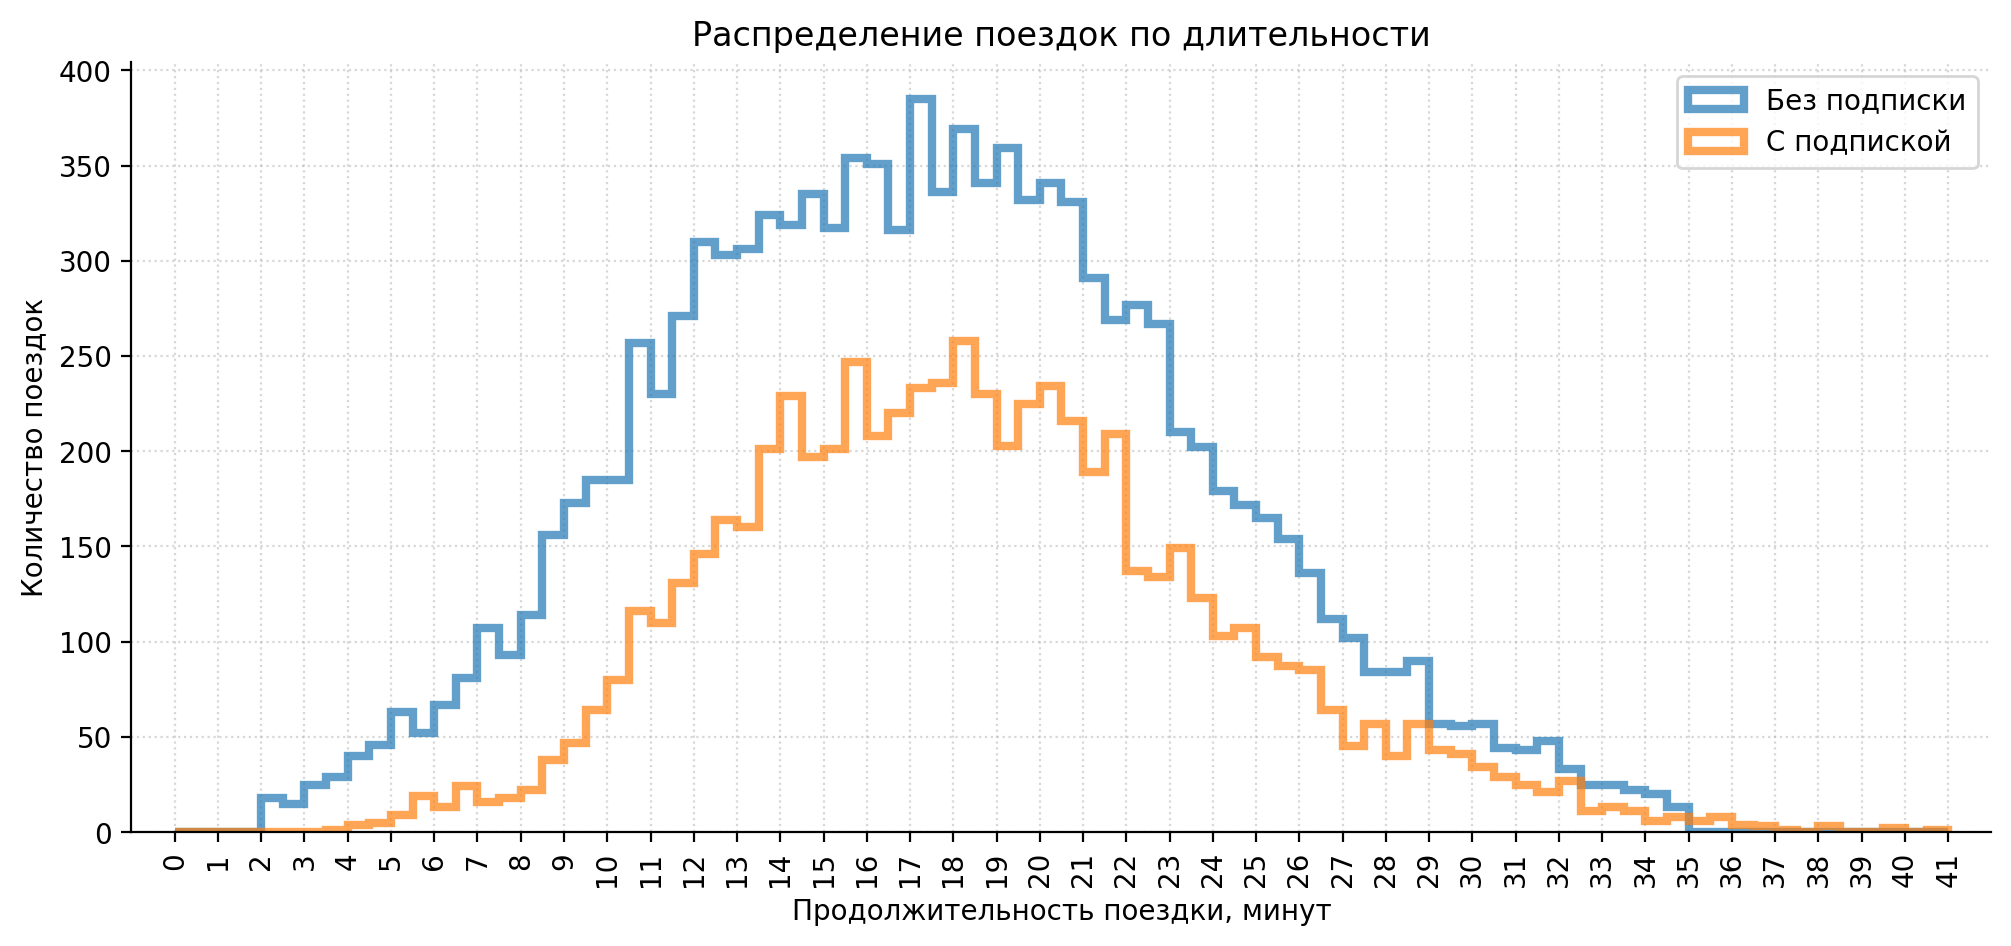

In [97]:
min_value = 0
max_value = 41
bin_width = 0.5

plt.figure(figsize=(12, 5))

ax = free_subscription_data['duration'].plot(
    kind='hist',
    histtype='step',
    bins=int((max_value - min_value) / bin_width), 
    range=(min_value, max_value),
    linewidth=3,
    alpha=0.7,
    label='Без подписки',
    legend=True
)

ultra_subscription_data['duration'].plot(
    kind='hist',
    histtype='step',
    bins=int((max_value - min_value) / bin_width), 
    range=(min_value, max_value),
    linewidth=3,
    alpha=0.7,
    label='С подпиской',
    ax=ax,
    legend=True
)

ax.set_title('Распределение поездок по длительности')
ax.set_xlim([min_value - bin_width * 2, max_value + bin_width * 2])
ax.set_xlabel('Продолжительность поездки, минут')
ax.set_ylabel('Количество поездок')
ax.set_xticks(np.arange(min_value, max_value + bin_width, bin_width * 2, dtype='int'))
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.5, linestyle=':')

pass

Визуально распределения продолжительности поездок, которые совершают пользователи с подпиской и без нее, весьма похожи.

## Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [101]:
def sum_ceiled_duration(value):
    return int(sum(np.ceil(value)))


revenue_data = united_data.pivot_table(
    index=['user_id', 'date_month'],
    aggfunc={'distance': ['count', 'sum'], 
             'duration': sum_ceiled_duration, 
             'start_ride_price': 'first', 
             'minute_price': 'first',
             'subscription_fee': 'first',
             'subscription_type': 'first'}
)

revenue_data.columns = ['rides_count', 'total_distance', 
                        'total_duration', 'minute_price', 
                        'start_ride_price', 'subscription_fee', 
                        'subscription_type']

# проверка на пропуски
if revenue_data.isna().sum().sum() == 0:
    display('ok')

'ok'

В этот же датафрейм добавим столбец `revenue` с помесячной выручкой, которую принёс каждый пользователь. При подсчете выручки округлим продолжительность каждой поездки до следующего целого числа. Помесячная выручка считается по формуле:
`стоимость старта поездки` × `количество поездок` + `стоимость одной минуты поездки` × `общая продолжительность всех поездок в минутах` + `стоимость подписки`.

In [103]:
def calc_revenue(row):
    revenue = row['start_ride_price'] * row['rides_count']
    revenue += row['minute_price'] * row['total_duration']
    revenue += row['subscription_fee']
    return revenue


revenue_data['revenue'] = revenue_data.apply(calc_revenue, axis=1) 

Посмотрим на получившийся датафрейм с агрегированными данными.

In [105]:
revenue_data.head()

rides_count  total_distance  total_duration  minute_price  \
user_id date_month                                                              
1       1                     2     7027.511294              42             6   
        4                     1      754.159807               7             6   
        8                     2     6723.470560              46             6   
        10                    2     5809.911100              32             6   
        11                    3     7003.499363              56             6   

                    start_ride_price  subscription_fee subscription_type  \
user_id date_month                                                         
1       1                          0               199             ultra   
        4                          0               199             ultra   
        8                          0               199             ultra   
        10                         0               199             ultra   
        11                         0               199             ultra   

                    revenue  
user_id date_month           
1       1               451  
        4               241  
        8               475  
        10              391  
        11              535

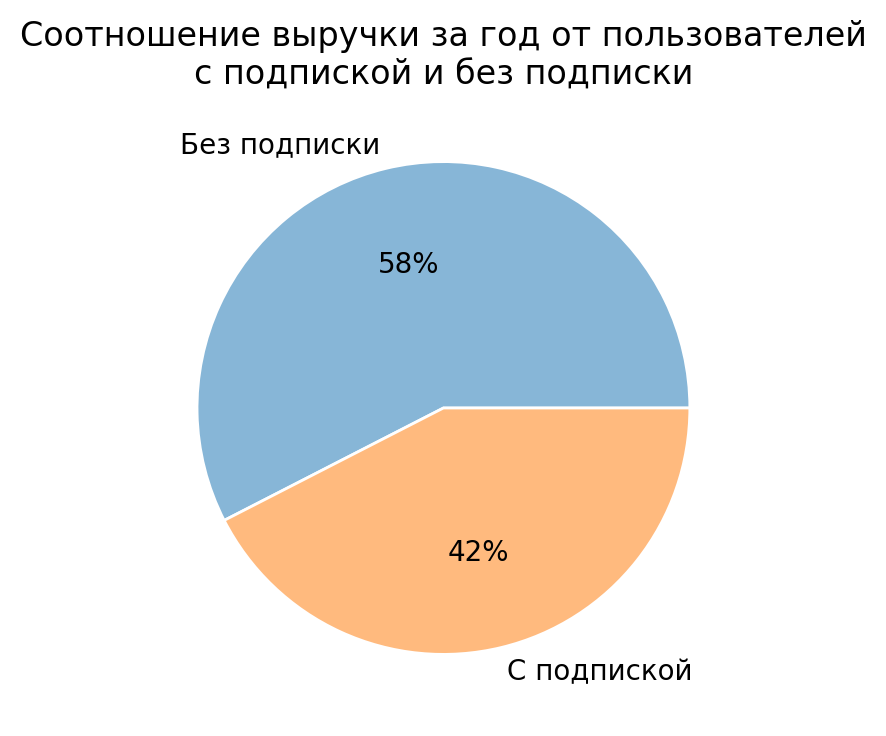

In [106]:
plt.figure(figsize=(4, 4))
plt.pie(
    [revenue_data.query('subscription_type == "free"')['revenue'].sum(),
     revenue_data.query('subscription_type == "ultra"')['revenue'].sum()], 
    labels=['Без подписки', 'С подпиской'],
    autopct='%.0f%%', 
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    colors=['#1f77b488', '#ff7f0e88']
)
plt.title('Соотношение выручки за год от пользователей\nс подпиской и без подписки')
pass

## Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Гипотеза 1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

- Нулевая гипотеза: средние длительности поездок у пользователей из двух групп равны.
- Альтернативная гипотеза: средяя длительность поездки у пользователей с подпиской больше, чем средняя длительность поездки у пользователей без подписки.

In [111]:
# задаем уровень статистической значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(
    ultra_subscription_data['duration'],
    free_subscription_data['duration'],
    alternative='greater')

# проверяем p-value
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')
f'p-value: {results.pvalue}'

'Отвергаем нулевую гипотезу'

'p-value: 4.704468074453899e-28'

Полученное значение p-value практически равно 0, поэтому можно отвергнуть нулевую гипотезу. **Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.** Но говорить о том, что пользователи с подпиской могут быть «выгоднее» для компании пока что рано, поскольку стоимость минуты проката для пользователей с подпиской ниже, чем для пользователей без подписки.

### Гипотеза 2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

- Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равняется 3130 метрам.
- Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [115]:
# задаем уровень статистической значимости
alpha = 0.05

optimal_distance = 3130

# проводим ttest, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_1samp(
    ultra_subscription_data['distance'],
    optimal_distance,
    alternative='greater')

# проверяем p-value
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')
f'p-value: {results.pvalue}'

'Нет оснований отвергнуть нулевую гипотезу'

'p-value: 0.9195368847849785'

Полученное значение p-value ~92%, поэтому **нет оснований отвергнуть гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.** Значит, самокаты в среднем эксплуатируются в правильном с точки зрения износа режиме и не выдут из строя раньше времени.

### Гипотеза 3

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

- Нулевая гипотеза: средняя помесячная выручка от пользователей с подпиской равна средней помесячной выручке от пользователей без подписки.
- Альтернативная гипотеза: средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.

In [119]:
# задаем уровень статистической значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(
    revenue_data.query('subscription_type == "ultra"')['revenue'],
    revenue_data.query('subscription_type == "free"')['revenue'],
    alternative='greater'
)

# проверяем p-value
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')
f'p-value: {results.pvalue}'

'Отвергаем нулевую гипотезу'

'p-value: 2.0314113674863288e-30'

Полученное значение p-value практически равно 0, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что **средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.** А это означает, что пользователи с подпиской «выгоднее» для компании. В таком случае стоит задуматься о стимулировании пользователей к приобретению подписки, например, раздачей промокодов на один бесплатный месяц подписки.

In [121]:
display(f'''Средняя выручка за месяц от пользователя с подпиской: \
{revenue_data.query('subscription_type == "ultra"')['revenue'].mean():.0f}''')
display(f'''Средняя выручка за месяц от пользователя без подписки: \
{revenue_data.query('subscription_type == "free"')['revenue'].mean():.0f}''')

'Средняя выручка за месяц от пользователя с подпиской: 363'

'Средняя выручка за месяц от пользователя без подписки: 329'

### Гипотеза 4

Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

**Для проверки гипотезы понадобится t-тест на равенство средних для парных выборок** (метод `scipy.stats.ttest_rel()`). В нашем случае пара измерений для каждого пользователя — это количество его обращений в техподдержку до и после обновления сервера.
- Нулевая гипотеза: среднее количество обращений в техподдержку не изменилось.
- Альтернативная гипотеза: среднее количество обращений в техподдержку до обновления сервера больше, чем после обновления.

Выглядеть такой тест будет следующим образом:

In [125]:
# задаем уровень статистической значимости
alpha = 0.05

# количество обращений пользователей в техподдержку до обновления сервера
values_before = [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 8, 20]

# количество обращений пользователей в техподдержку после обновления сервера
values_after = [0, 5, 0, 0, 0, 0, 1, 0, 1, 1, 2, 3, 1, 3, 4, 1, 1, 2, 4]

# проводим ttest для двух парных выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_rel(
    values_before,
    values_after,
    alternative='greater'
)

# проверяем p-value
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')
f'p-value: {results.pvalue}'

'Отвергаем нулевую гипотезу'

'p-value: 0.03953233676513707'

Полученное значение p-value ~4%, меньше заданного уровеня статистической значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что **среднее количество обращений в техподдержку значимо снизилось.** У пользователей сервиса стало меньше поводов обращаться в техподдержку — уровень удовлетворённости клиентов вырос.

## Шаг 7. Распределения

### Промокоды

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

Ситуацию с раздачей промокодов можно смоделировать биномиальным распределением, поскольку:
- Проводится фиксированное число попыток n (рассылается n промокодов).
- Каждая попытка — простой эксперимент Бернулли ровно с двумя исходами (каждый клиент либо продляет подписку, либо нет).
- Вероятность успеха p=0.1 одинакова для всех n попыток.
- Попытки независимы между собой.

Подберем такое n, при котором веоятность не выполнить план составила бы примерно 5%. План считается невыполненным, если подпишутся 99 и менее клиентов.

In [131]:
n = 1000 # начнем подбор с тысячи попыток
p = 0.1
threshold = 99
while (prob := st.binom.cdf(threshold, n, p)) > 0.05:
    n += 1
f'Отправлено промокодов {n}: вероятность не выполнить план {(prob * 100):.2f}%'

'Отправлено промокодов 1161: вероятность не выполнить план 4.98%'

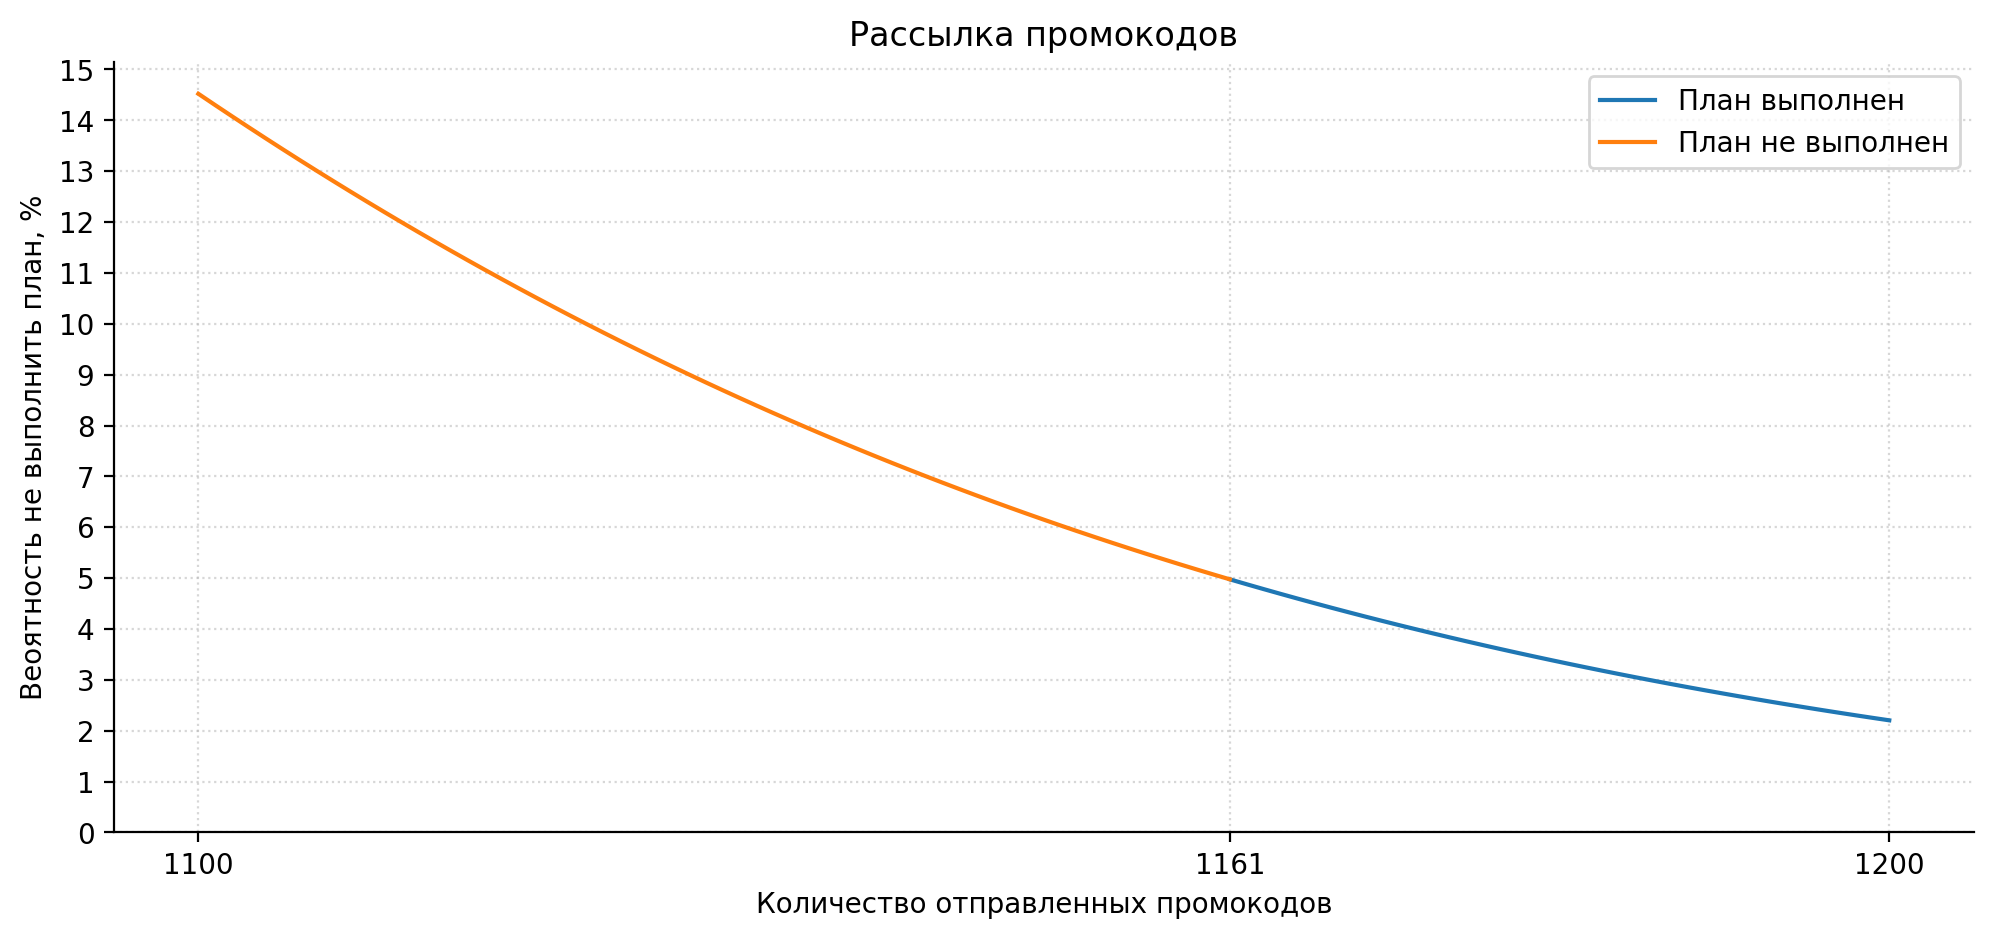

In [132]:
p = 0.1
threshold = 99
x_values = np.arange(1100, 1200 + 1)
y_values = st.binom.cdf(threshold, x_values, p) * 100

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(
    x_values[61:], y_values[61:],
    x_values[:62], y_values[:62]
)
ax.set_title('Рассылка промокодов')
ax.legend(['План выполнен', 'План не выполнен'])
ax.set_xlabel('Количество отправленных промокодов')
ax.set_ylabel('Веоятность не выполнить план, %')
ax.grid(True)
ax.set_xticks([x_values.min(), 1161, x_values.max()])
ax.set_yticks(np.arange(0, np.ceil(y_values.max()) + 1, 1))
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.5, linestyle=':')

pass

Получается, **нужно разослать 1161 промокод — тогда вероятность не выполнить план составит 4.98% (~5%).**

### Push-уведомления

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Ситуацию с рассылкой push-уведомлений можно смоделировать биномиальным распределением, поскольку:
- Проводится фиксированное число попыток n=1000000 (рассылается 1 млн push-уведомлений).
- Каждая попытка — простой эксперимент Бернулли ровно с двумя исходами (каждый клиент либо открывает уведомление, либо нет).
- Вероятность успеха p=0.4 одинакова для всех n попыток.
- Попытки независимы между собой.

Для поиска вероятности того, что уведомление откроют не более 399,5 тыс. пользователей, нужно всего лишь сложить вероятности того, что уведомления откроют от 0 до 399,5 тыс. пользователей. Но не будем мучать компуктер сотнями тысяч вычислений факториалов, а аппроксимируем биномиальное распределение нормальным — такая аппроксимация будет хорошей, поскольку значение n достаточно велико, а p далеко от 0 и 1. Построим примерный график распределения.

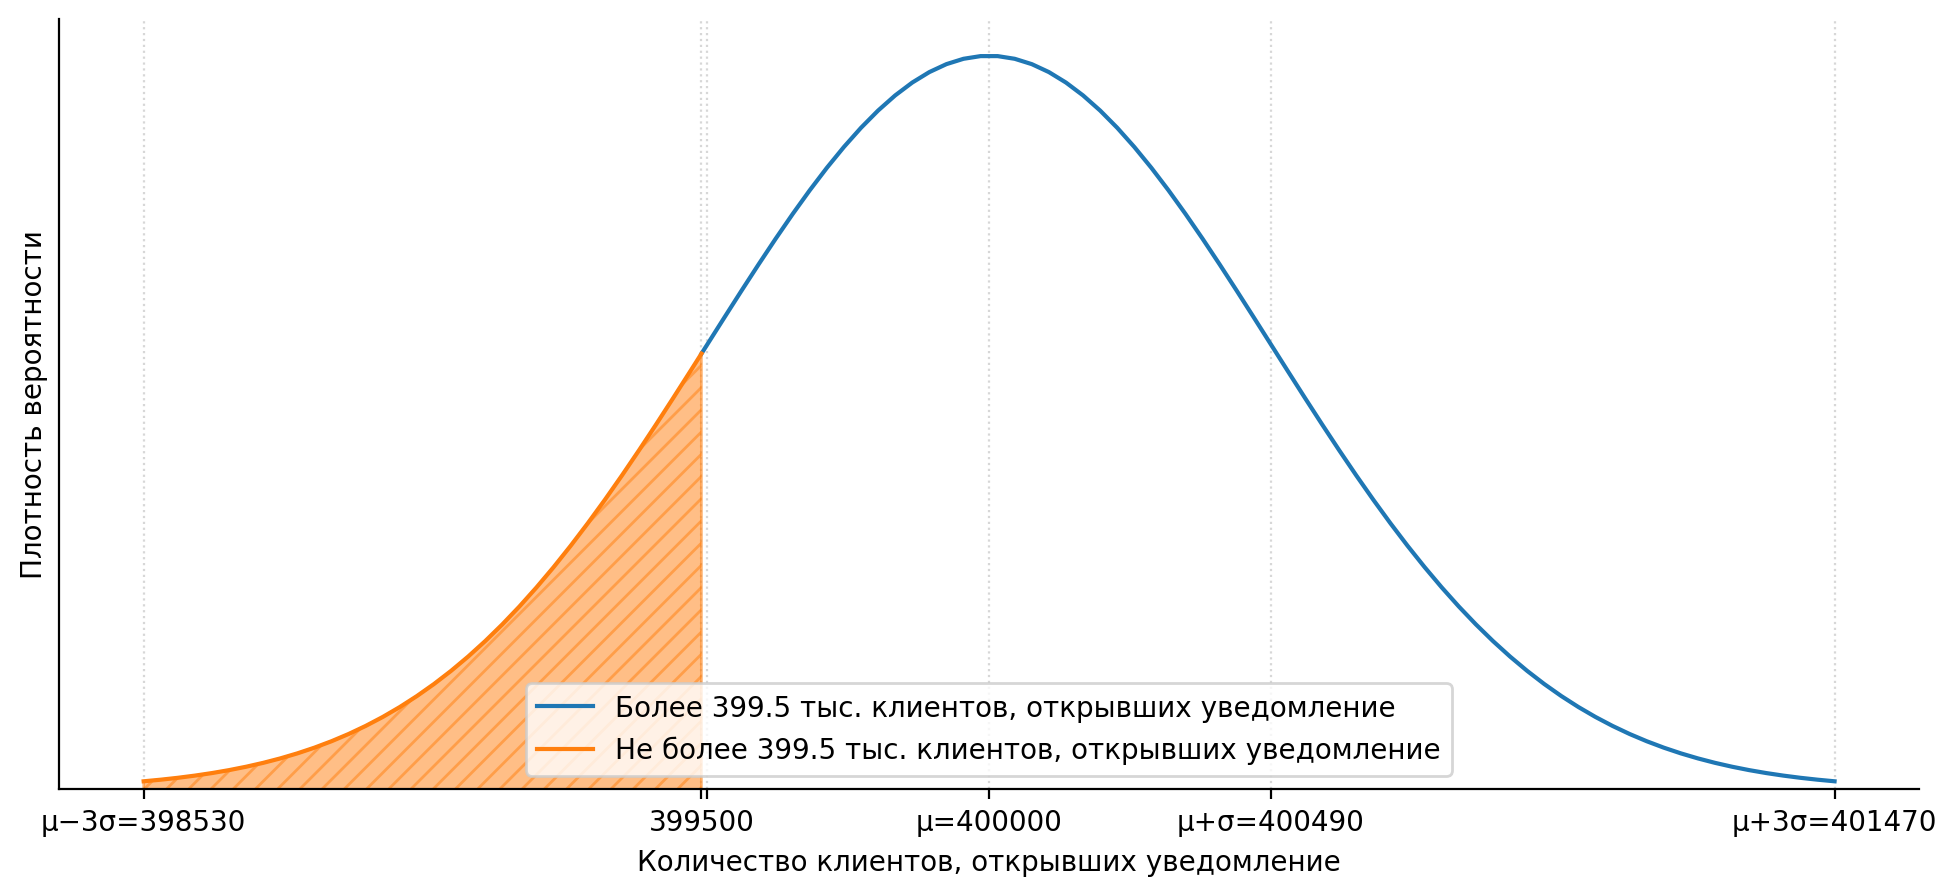

In [137]:
n = 1000000
p = 0.4
threshold = 399500

mu = n * p
sigma = np.sqrt(n * p * (1 - p))

x_values = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
# вставим в последовательность значений по оси x значение 399500
for i in np.arange(len(x_values)):
    if x_values[i] == threshold:
        ind_threshold = i
        break
    elif x_values[i] > threshold:
        x_values = np.insert(x_values, i, threshold)
        ind_threshold = i
        break

distr = np.fromiter(map(lambda k: st.norm.pdf(k, mu, sigma), x_values), np.float64)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(
    x_values[ind_threshold:], distr[ind_threshold:], 
    x_values[:ind_threshold + 1], distr[:ind_threshold + 1]
)
ax.fill_between(
    x_values[:ind_threshold + 1], distr[:ind_threshold + 1],
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],
    hatch='///',
    alpha=0.5
)
ax.legend(['Более 399.5 тыс. клиентов, открывших уведомление', 'Не более 399.5 тыс. клиентов, открывших уведомление'])
ax.set_xlabel('Количество клиентов, открывших уведомление')
ax.set_ylabel('Плотность вероятности')
ax.set_xticks([mu - 3 * sigma, threshold, mu - sigma, mu, mu + sigma, mu + 3 * sigma])
ax.set_xticklabels([f'μ−3σ={mu - 3 * sigma:.0f}', 399500, '', 
                    f'μ={mu:.0f}', f'μ+σ={mu + sigma:.0f}', f'μ+3σ={mu + 3 * sigma:.0f}'])
ax.set_yticks([])
ax.set_ylim(bottom=0)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.5, linestyle=':')

pass

На графике мы видим, что интересующее нас значение 399,5 тыс. лежит примерно в −σ от центра распределения. По правилу трёх сигм вероятность попасть в интервал [μ − σ, μ + σ] равна примерно 68.2%. А значит вероятность попасть в левый «хвост» примерно равна (100 − 68.2) / 2 = 15.9%. Это теоретически. Теперь вычислим вероятность левого «хвоста» практически.

In [139]:
f'{st.norm.cdf(threshold, mu, sigma) * 100:.2f}%'

'15.37%'

Опять 15 с лишним процентов. Совпадение? Не думаю. Таким образом **вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет ~15%.** А это значит, что с вероятностью 85% открытых уведомлений будет больше, чем 399,5 тыс. — отдел маркетинга будет доволен.

## Итоги исследования

Проведено исследование данных о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов (1,5 тыс. записей), а также об их поездках (18 тыс. записей) за 2021 год.

**В процессе предобработки данных** серьезных проблем не выявлено. В данных о пользователях обнаружено и удалено несколько десятков записей-дубликатов, однако такое количество дубликатов не оказало существенного влияния на результаты исследования.

**По результатам анализа данных** сервиса аренды самокатов GoFast можно выделить несколько основных моментов:
- В выборку попали данные о пользователях из 8 городов. Больше всего пользователей из Пятигорска, меньше всего — из Москвы. Выглядит странно, самый большой город на последнем месте. Тут может быть несколько причин:
    - Была взята случайная выборка. Однако на ее репрезентативность повлияло смещение в сторону каких-то отдельных городов внутри генеральной совокупности.
    - Была взята стратифицированная выборка — из генеральной совокупности взяты пропорциональные случайные выборки по городам. В таком случае мы можем сделать вывод, что популярность сервиса аренды самокатов GoFast в разных городах очень сильно различается.
- Пользователей без подписки в выборке примерно 57%, а с подпиской — 43%.
- Целевая аудитория сервиса аренды самокатов GoFast — молодые люди в возрасте от 22 до 28 лет. Пользователи такого возраста составляют примерно половину выборки. Средний возраст — примерно 25 лет. Минимальный и максимальный возраст пользователей — 12 лет и 43 года соответственно.
- Среднее расстояние поездки составляет ~3 км, более половины поездок сосредоточено в диапазоне от ~2,5 км до 3,8 км. Хорошо прослеживаются два сегмента поездок — «короткие» (с пиком ~600 метров) и «длинные» (с пиком ~3 км), при этом «коротких» поездок гораздо меньше. Вероятно, такие сегменты обусловлены различными целями аренды самокатов: «короткие» поездки для того, чтобы протестировать сервис или чтобы добраться от остановки общественного транспорта до дома или работы, а «длинные» — для развлечения.
- И у пользователей с подпиской, и у пользователей без подписки наблюдаются сегменты «коротких» и «длинных» с точки зрения расстояния поездок. При этом в сегменте «длинных» поездок у пользователей с подпиской степень разброса значений гораздо меньше, чем у пользователей без подписки.
- Средняя длительность поездки около 18 минут. Половина поездок длятся от 13 до 22 минут. При этом в выборке присутствуют аномальные данные — примерно сотня поездок с длительностью меньше минуты и расстоянием более 4 км. Очевидно, такие аномалии образовались в результате технических сбоев или программной ошибки — об этом стоит сообщить технической команде сервиса. Например, мог сбоить гео-модуль в самокатах, тогда стоит проанализировать, носят ли такие сбои случайный характер, или зависят от определенных локаций, или же связаны с конкретными «сломанными» самокатами.
- Визуально распределения продолжительности поездок, которые совершают пользователи с подпиской и без нее, весьма похожи.
- За год сервис аренды заработал на пользователях без подписки больше, чем на пользователях с подпиской, соотношение 58% на 42%. 

В процессе исследования данных было выдвинуто и **проверно несколько гипотез**:
- Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.
- Нет оснований отвергнуть гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Значит, самокаты в среднем эксплуатируются в правильном с точки зрения износа режиме и не выдут из строя раньше времени.
- Есть основания говорить, что средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная от пользователей без подписки.  А это означает, что пользователи с подпиской «выгоднее» для компании. В таком случае стоит задуматься о стимулировании пользователей к приобретению подписки, например, раздачей промокодов на один бесплатный месяц подписки.
- Для проверки гипотезы о значительном снижении количества обращений в техподдержку понадобится t-тест на равенство средних для парных выборок. В нашем случае пара измерений для каждого пользователя — это количество его обращений в техподдержку до и после обновления сервера.

Также в процессе исследования было **отвечено на несколько вопросов от отдела маркетинга сервиса GoFast**:
- Отделу маркетинга нужно разослать 1161 промокод на один бесплатный месяц подписки — тогда вероятность не выполнить план (по плану 100 существующих клиентов должны продлить подписку) составит ~5%.
- Если отдел маркетинга разошлет клиентам 1 млн push-уведомлений в мобильном приложении, то вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, составит ~15%, а это значит, что с вероятностью ~85% открытых уведомлений будет больше установленного порогового значения.